In [42]:
import numpy as np
# import cv2
import tifffile as tiff
from shapely.geometry import Polygon, mapping, shape, box
from skimage import io
from skimage.measure import label, regionprops
# import matplotlib.pyplot as plt
from rasterio import features
import scanpy as sc
import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import scipy

from ast import literal_eval

from SGanalysis.SGobject import SGobject 


from sklearn.cluster import AgglomerativeClustering as AggCluster

import sys
import os

tools_path  = '/Users/grantkinsler/Documents/Penn/Research/SpatialBarcodes/analysis/tools/tools.py'
# tools_path  = '/Users/grantkinsler/Documents/Penn/Research/SpatialBarcodes/SpatialBarcodes/analysis/tools/tools.py'
# tools_path = '/home/wniu/Documents/GRK/SpatialBarcodes/analysis/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools

In [2]:
### roi_name: [segmentation_file, spots_file, out_path]
roi_file_paths = {
    # 'roi_1':{'segmentation_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-05-21_mouseexp_expression/projects/roi_1/segmentations/nuclei_20240604_nuclei.tiff',
    #                        'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-05-21_mouseexp_expression/projects/roi_1/exports/decode_20240604.csv',
    #                         'out_path':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-05-21_mouseexp_expression/projects/roi_1/exports'
    #                        },
    #               'roi_2':{'segmentation_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-05-21_mouseexp_expression/projects/roi_2/segmentations/nuclei_20240529_nuclei.tiff',
    #                        'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-05-21_mouseexp_expression/projects/roi_2/exports/decode_20240604.csv',
    #                         'out_path':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-05-21_mouseexp_expression/projects/roi_2/exports'
    #                        },
    #               'roi_3':{'segmentation_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-05-21_mouseexp_expression/projects/roi_3/segmentations/nuclei_20240604_nuclei.tiff',
    #                        'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-05-21_mouseexp_expression/projects/roi_3/exports/decode_20240604.csv',
    #                         'out_path':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-05-21_mouseexp_expression/projects/roi_3/exports'
    #                        },
                #   'timezero_roi_1':{'segmentation_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi1/segmentations/segmentation_20240513_nuclei.tiff',
                #               # 'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi1/genes/matrix_20240517_segmentation_segmentation_20240513_cells.csv',
                #               'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi1/transcripts/20240517_segmentation_withRefid.csv',
                #               'out_path':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi1/exports'
                #               },
                    # 'timezero_roi_2':{'segmentation_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi2/segmentations/segment_091924_nuclei.tiff',
                    #           # 'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi1/genes/matrix_20240517_segmentation_segmentation_20240513_cells.csv',
                    #           'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi2/transcripts/transcripts.csv',
                    #           'out_path':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi2/exports'
                    #           },
                    # 'timezero_roi_3':{'segmentation_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi3/segmentations/segment_20240921_nuclei.tiff',
                    #           # 'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi1/genes/matrix_20240517_segmentation_segmentation_20240513_cells.csv',
                    #           'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi3/transcripts/transcripts.csv',
                    #           'out_path':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi3/exports'
                    #           },


                    #  'run2_roi_1':{'segmentation_file':'/media/wniu/GRK_003/2024-08-08_spatialbarcode_tumor2_projects/roi_1/exports/segmentation.tiff',
                    #           'spots_file':'/media/wniu/GRK_003/2024-08-08_spatialbarcode_tumor2_projects/roi_1/exports/transcripts.csv',
                    #            'out_path':'/media/wniu/GRK_003/2024-08-08_spatialbarcode_tumor2_projects/roi_1/exports/',
                    #             },
#                    'run2_roi_2':{'segmentation_file':'/media/wniu/GRK_003/2024-08-08_spatialbarcode_tumor2_projects/roi_2/exports/segmentation.tiff',
#                                'spots_file':'/media/wniu/GRK_003/2024-08-08_spatialbarcode_tumor2_projects/roi_2/exports/transcripts.csv',
#                                'out_path':'/media/wniu/GRK_003/2024-08-08_spatialbarcode_tumor2_projects/roi_2/exports/',
#                                },
#                    'run2_roi_3':{'segmentation_file':'/media/wniu/GRK_003/2024-08-08_spatialbarcode_tumor2_projects/roi_3/exports/segmentation.tiff',
#                                'spots_file':'/media/wniu/GRK_003/2024-08-08_spatialbarcode_tumor2_projects/roi_3/exports/transcripts.csv',
#                                'out_path':'/media/wniu/GRK_003/2024-08-08_spatialbarcode_tumor2_projects/roi_3/exports/',
#                                },
                    # 'dish_roi1':{'segmentation_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-02-27_spatialbarcodes_SG_expression/projects/2024-02-27_spatialbarcodes_expression/roi_1/segmentations/segmentation_1_nuclei.tiff',
                    #           # 'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi1/genes/matrix_20240517_segmentation_segmentation_20240513_cells.csv',
                    #           'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-02-27_spatialbarcodes_SG_expression/projects/2024-02-27_spatialbarcodes_expression/roi_1/exports/transcripts.csv',
                    #           'out_path':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-02-27_spatialbarcodes_SG_expression/projects/2024-02-27_spatialbarcodes_expression/roi_1/exports'
                    #           },
        
                    'dish_roi2':{'segmentation_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-02-27_spatialbarcodes_SG_expression/projects/2024-02-27_spatialbarcodes_expression/roi_2/segmentations/segmentation_1_nuclei.tiff',
                              # 'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi1/genes/matrix_20240517_segmentation_segmentation_20240513_cells.csv',
                              'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-02-27_spatialbarcodes_SG_expression/projects/2024-02-27_spatialbarcodes_expression/roi_2/exports/transcripts.csv',
                              'out_path':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-02-27_spatialbarcodes_SG_expression/projects/2024-02-27_spatialbarcodes_expression/roi_2/exports/'
                              },

                    # 'dish_roi3':{'segmentation_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-02-27_spatialbarcodes_SG_expression/projects/2024-02-27_spatialbarcodes_expression/roi_3/segmentations/20240321_segmentation_2_cells.tiff',
                    #           # 'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi1/genes/matrix_20240517_segmentation_segmentation_20240513_cells.csv',
                    #           'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-02-27_spatialbarcodes_SG_expression/projects/2024-02-27_spatialbarcodes_expression/roi_3/exports/transcripts.csv',
                    #           'out_path':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-02-27_spatialbarcodes_SG_expression/projects/2024-02-27_spatialbarcodes_expression/roi_3/exports/'
                    #           },
                  
                  }


In [3]:
partially_processed = False
cutoff = 3
barcode_cols = ['bc_{:03d}'.format(i) for i in range(1,97)]

from SGanalysis.SGobject import SGobject

In [133]:
roi_name = 'dish_roi2'

image_path = '/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-02-27_spatialbarcodes_SG_expression/rawData/roi_2/hyb_1_aligned.tiff'

In [32]:
df = pd.read_csv(f'{roi_file_paths[roi_name]["out_path"]}/cell_by_gene_matrix_dilate10_20240718_withbarcodes_atleast{cutoff}.csv')

with open(f'{roi_file_paths[roi_name]["out_path"]}/sg_object_dilate10_20240718.pkl', 'rb') as f:
    sg_obj = pickle.load(f)

In [31]:
total_bc_threshold = 10

# include cells with at least 10 barcode spots
has_bcs = df[df[barcode_cols].sum(axis=1) >= 10]
matrix = has_bcs[barcode_cols]

print('Clustering barcodes...')
print('Calculating distance matrix...')

matrix_norm = matrix.div(matrix.sum(axis=1), axis=0)
braycurtis_dist = scipy.spatial.distance.pdist(matrix_norm,metric='braycurtis')


Clustering barcodes...
Calculating distance matrix...


In [34]:
has_bcs['cell_id'] = has_bcs['cell_id'].astype(str) 
sg_obj.gdf['cell_id'] = sg_obj.gdf.index.astype('string')
sg_obj.assigned_points_gdf['cell_id'] = sg_obj.assigned_points_gdf['object_id'].astype(str)

sg_obj.gdf = sg_obj.gdf.merge(has_bcs[['cell_id']+list(has_bcs.columns.difference(sg_obj.gdf.columns))],on=['cell_id'])



In [181]:
thresholds = [0,0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.75]
clusterings = {}

for threshold in thresholds:

    cluster = AggCluster(distance_threshold=threshold,n_clusters=None,linkage='average',affinity='precomputed').fit(scipy.spatial.distance.squareform(braycurtis_dist))
    clusterings[threshold] = cluster

    # gene_cols = [col for col in df.columns if 'bc_' not in col and col not in ['cell_id','called_barcodes','n_called_barcodes','barcode_names','area','center_x','center_y','nucleus','nucleus_centroid','nucleus_dilated']]    

    # adata_genes = sc.AnnData(df[gene_cols])

In [182]:
avg_cluster_sizes = [np.mean(np.unique(cluster.labels_,return_counts=True)[1]) for cluster in clusterings.values()]

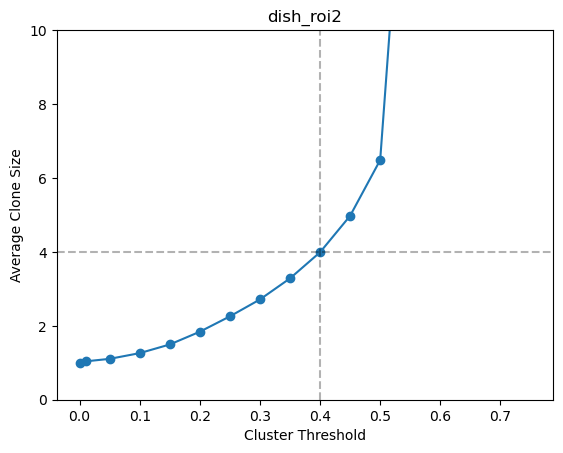

In [183]:

plt.plot(thresholds,avg_cluster_sizes,marker='o')
plt.xlabel('Cluster Threshold')
plt.ylabel('Average Clone Size')
plt.ylim(0,10)

plt.title(roi_name)

plt.axvline(0.4,color='k',linestyle='--',alpha=0.3)
plt.axhline(avg_cluster_sizes[np.where(np.isin(thresholds,[0.4]))[0][0]],color='k',linestyle='--',alpha=0.3)
# plt.yscale('log')

In [41]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [21]:
cluster_df[cluster_df['cluster'] == label].index

Int64Index([16374], dtype='int64')

In [ ]:
def get_cluster_names(cluster_df, cluster, cutoff = 3,barcode_cols = ):

    for clu in np.unique(cluster.labels_):
        clusterings[clu] = cluster_df.index[cluster.labels_ == clu]

        avg_bc_counts = np.mean(cluster_df[cluster.labels_ == clu],axis=0)
        # print(avg_bc_counts)
        # break

        found_bcs = []

        for bc in barcode_cols:
            if avg_bc_counts[bc] > cutoff:
                found_bcs.append(bc)

#        print(clu,found_bcs)

        cluster_found_barcodes[clu] = found_bcs
        cluster_n_found_barcodes[clu] = len(found_bcs)

        cluster_barcode_names[clu] = '-'.join(sorted(found_bcs))

In [184]:
avg_cluster_dist = {}
max_cluster_dist = {}

for threshold in thresholds:
    cluster = clusterings[threshold]

    cluster_df = has_bcs
    cluster_df['cluster'] = cluster.labels_

    # cluster_found_barcodes




    # compute max and mean pairwise distance within each cluster
    avg_cluster_dist[threshold] = []
    max_cluster_dist[threshold] = []


    for label in np.unique(cluster.labels_):

        if len(cluster_df[cluster_df['cluster'] == label]) > 1:
        
            avg_cluster_dist[threshold].append(np.mean(scipy.spatial.distance.pdist(cluster_df[cluster_df['cluster'] == label][['center_x','center_y']],metric='euclidean')))
            max_cluster_dist[threshold].append(np.max(scipy.spatial.distance.pdist(cluster_df[cluster_df['cluster'] == label][['center_x','center_y']],metric='euclidean')))



In [186]:
chosen_threshold = 0.2

cluster = clusterings[threshold]

cluster_df = has_bcs
cluster_df['cluster'] = cluster.labels_


/Users/grantkinsler/miniforge3/envs/spatialgenomics-env2/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/grantkinsler/miniforge3/envs/spatialgenomics-env2/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Physical Distance between Cells in Same Cluster')

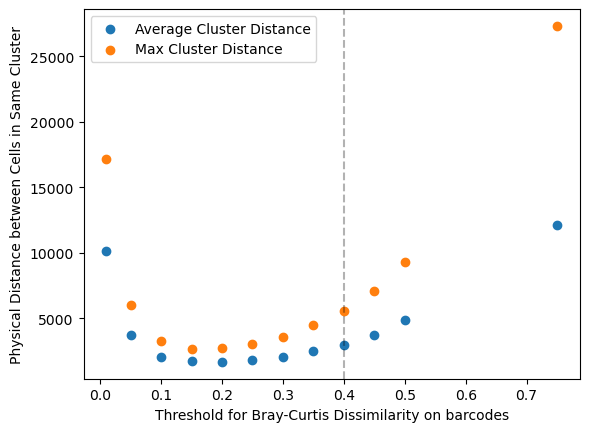

In [185]:
plt.scatter(thresholds,[np.mean(avg_cluster_dist[threshold]) for threshold in thresholds],label='Average Cluster Distance')

plt.scatter(thresholds,[np.mean(max_cluster_dist[threshold]) for threshold in thresholds],label='Max Cluster Distance')

plt.axvline(0.4,color='k',linestyle='--',alpha=0.3)

plt.legend()
plt.xlabel('Threshold for Bray-Curtis Dissimilarity on barcodes')
plt.ylabel('Physical Distance between Cells in Same Cluster')

From this, it appears that a threshold of 0.2 would be better. What cells are getting clustered with each of these analyses?

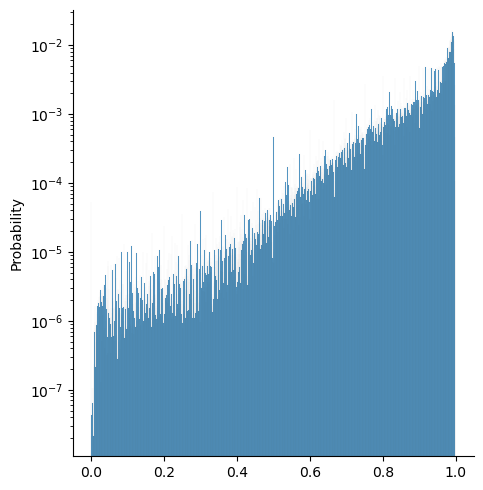

In [85]:
## Let's plot a histogram of the bray-curtis distances

sns.displot(braycurtis_dist[braycurtis_dist < 1],stat='probability')
plt.yscale('log')

In [35]:
braycurtis_dist_square  = scipy.spatial.distance.squareform(braycurtis_dist) 
spatial_distance_matrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(has_bcs[['center_x','center_y']],metric='euclidean'))

In [67]:
np.random.seed(1250)

random_indices = sorted(np.random.choice(range(len(spatial_distance_matrix)),size=1000,replace=False))

In [68]:
names_here = has_bcs['barcode_names'].values[random_indices]
cells_here = has_bcs['cell_id'].values[random_indices]

random_df = has_bcs.iloc[random_indices]

random_matrix = has_bcs[barcode_cols].iloc[random_indices]

# sg_obj

bc_square = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(random_matrix,metric='braycurtis'))
# dist_square = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(random_matrix[['center_x','center_y']],metric='euclidean'))

In [69]:
bc_square

array([[0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.89285714, 1.        ,
        1.        ],
       [1.        , 1.        , 0.        , ..., 0.96428571, 1.        ,
        1.        ],
       ...,
       [1.        , 0.89285714, 0.96428571, ..., 0.        , 1.        ,
        0.97619048],
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.97619048, 1.        ,
        0.        ]])

In [70]:
random_df

,object_id,AKT1,AXL,BGN,BIRC3,BIRC5,BMP2,BMP4,CALD1,CAPG,...,cell_id,called_barcodes,n_called_barcodes,barcode_names,nucleus,nucleus_dilated,nucleus_centroid,center_x,center_y,area
4,15,3.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,23.0,...,15,"['bc_018', 'bc_060']",2,bc_018-bc_060,"POLYGON ((14595 0, 14678 2, 14683 4, 14684 8, ...",POLYGON ((14549.240101543774 13.15954224408374...,POINT (14620.955251651316 16.88589636245232),14620.955252,16.885896,6756.912417
35,17,8.0,0.0,0.0,0.0,2.0,0.0,0.0,17.0,48.0,...,17,"['bc_015', 'bc_076']",2,bc_015-bc_076,"POLYGON ((18583 0, 18652 0, 18652 2, 18667 3, ...",POLYGON ((18574.49215797018 -5.233457852739992...,POINT (18620.169978154583 70.6480922824416),18620.169978,70.648092,19586.430808
61,62,6.0,0.0,0.0,0.0,5.0,0.0,0.0,8.0,53.0,...,62,['bc_047'],1,bc_047,"POLYGON ((17452 71, 17480 72, 17503 80, 17526 ...",POLYGON ((17448.28609323646 61.715233091147404...,POINT (17485.584960157088 140.9692558851063),17485.584960,140.969256,19277.644605
66,67,3.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,38.0,...,67,['bc_092'],1,bc_092,"POLYGON ((24379 82, 24383 83, 24402 124, 24413...",POLYGON ((24376.751404933013 72.25608804305381...,POINT (24376.57211396516 153.18150280484204),24376.572114,153.181503,13000.892389
123,131,8.0,0.0,0.0,0.0,7.0,0.0,0.0,17.0,62.0,...,131,"['bc_001', 'bc_004', 'bc_013', 'bc_031', 'bc_0...",5,bc_001-bc_004-bc_013-bc_031-bc_076,"POLYGON ((1256 232, 1291 234, 1308 242, 1317 2...",POLYGON ((1254.9453093798654 222.0557741530172...,POINT (1242.9180531681425 287.07737380944656),1242.918053,287.077374,20363.640552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16321,16323,2.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,20.0,...,16323,"['bc_001', 'bc_043']",2,bc_001-bc_043,"POLYGON ((8587 35478, 8608 35479, 8624 35487, ...",POLYGON ((8583.714793750587 35468.555032032935...,POINT (8603.195724520789 35543.11737948874),8603.195725,35543.117379,15707.329803
16335,16329,13.0,0.0,0.0,0.0,5.0,0.0,0.0,12.0,25.0,...,16329,"['bc_024', 'bc_027', 'bc_039', 'bc_049', 'bc_0...",7,bc_024-bc_027-bc_039-bc_049-bc_057-bc_088-bc_092,"POLYGON ((23408 35492, 23427 35493, 23444 3550...",POLYGON ((23374.003274853312 35616.13844807599...,POINT (23419.549564608926 35556.35851085886),23419.549565,35556.358511,17425.347165
16342,16341,8.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,33.0,...,16341,"['bc_007', 'bc_028', 'bc_064', 'bc_081']",4,bc_007-bc_028-bc_064-bc_081,"POLYGON ((24237 35522, 24253 35522, 24270 3552...",POLYGON ((24180.306581261895 35615.38440937952...,POINT (24254.554788721143 35572.00092659158),24254.554789,35572.000927,14824.038014
16348,16347,4.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,13.0,...,16347,"['bc_019', 'bc_030', 'bc_085']",3,bc_019-bc_030-bc_085,"POLYGON ((22712 35534, 22723 35534, 22741 3553...",POLYGON ((22665.306581261895 35615.38440937952...,POINT (22729.389791542322 35578.20100802441),22729.389792,35578.201008,11455.289682


In [87]:
n_called_bcs = 4

focal_object_options = random_df[random_df['n_called_barcodes'] >= n_called_bcs]['cell_id'].values
focal_index_options = np.where(np.isin(cells_here,focal_object_options))[0]
close_ix = np.where(bc_square < 0.2)

ixs,counts = np.unique(close_ix[0],return_counts=True)

ix_with_enough = ixs[np.where(counts > 1)]

ix_with_enough_and_bcs = [ix for ix in ix_with_enough if ix in focal_index_options]


In [88]:
ix_with_enough_and_bcs

[344, 350, 422, 426, 427, 431, 504, 550, 731, 740, 859, 861, 905, 914]

In [89]:
np.where(bc_square[focal_index,:] < 0.4)

(array([344, 350]),)

Focal index: 344 focal cell id: 5600 number of close cells: 2
5600 5600 0.0
True genes: ['bc_001', 'bc_004', 'bc_035', 'bc_041', 'bc_053', 'bc_062', 'bc_066']
     cell_id  bc_009  bc_014  bc_059  bc_083  bc_090  bc_091  bc_022  bc_076  \
5609    5600     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      bc_086  ...  bc_025  bc_035  bc_039  bc_059  bc_060  bc_062  bc_085  \
5609     0.0  ...     0.0    15.0     0.0     0.0     0.0    38.0     0.0   

      bc_089  bc_016  bc_068  
5609     0.0     0.0     0.0  

[1 rows x 179 columns]
5648 5648 0.0958904109589041
True genes: ['bc_001', 'bc_004', 'bc_035', 'bc_041', 'bc_053', 'bc_062', 'bc_066']
     cell_id  bc_022  bc_076  bc_086  bc_001  bc_008  bc_029  bc_068  bc_074  \
5659    5648     0.0     1.0     0.0    69.0     0.0     0.0     1.0     0.0   

      bc_075  ...  bc_068  bc_003  bc_025  bc_035  bc_039  bc_040  bc_059  \
5659     0.0  ...     1.0     0.0     0.0    13.0     0.0     0.0     1.0   

      bc_08

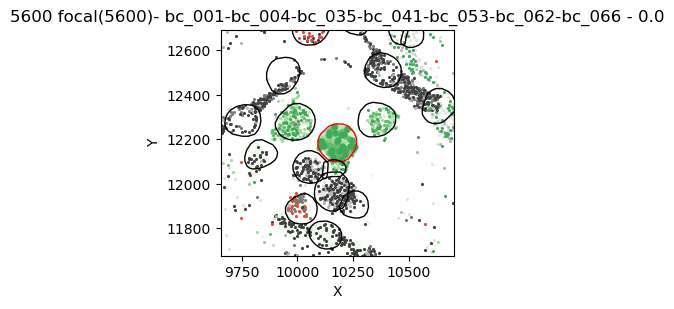

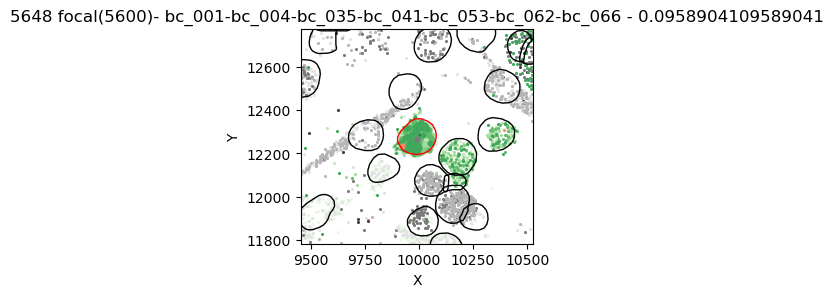

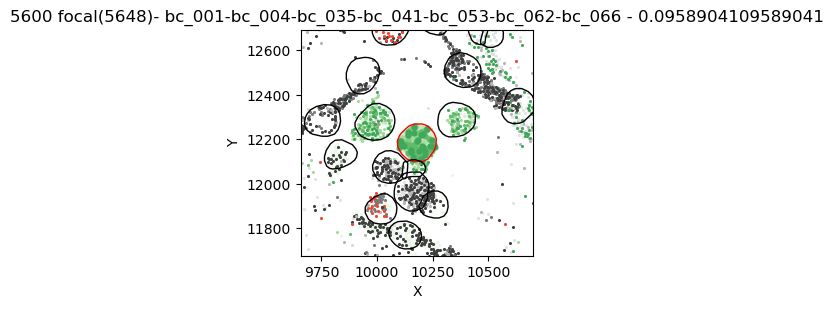

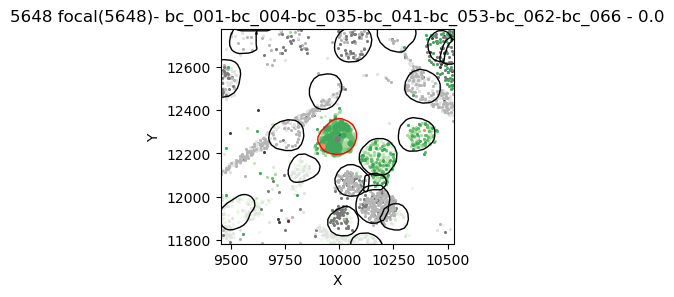

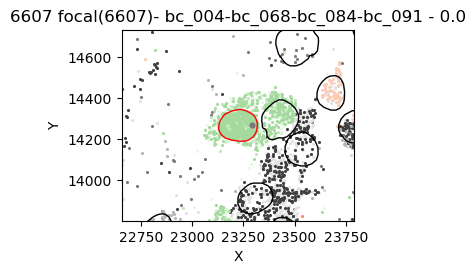

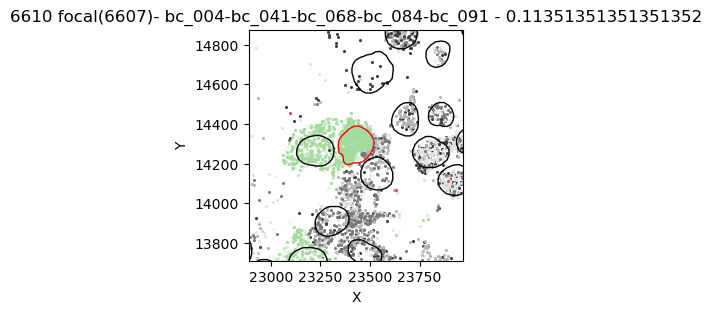

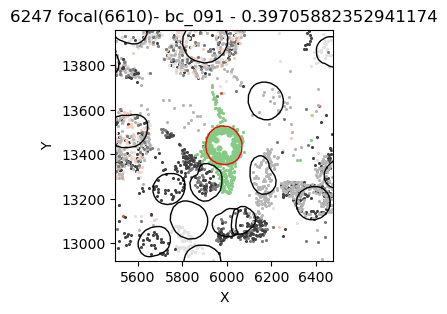

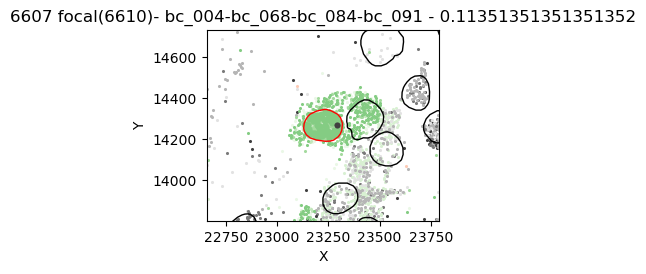

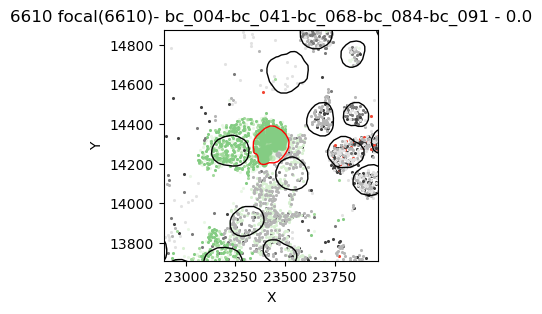

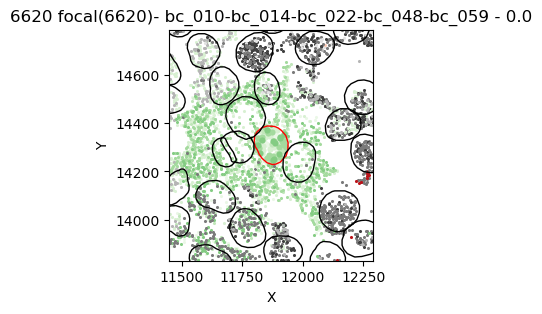

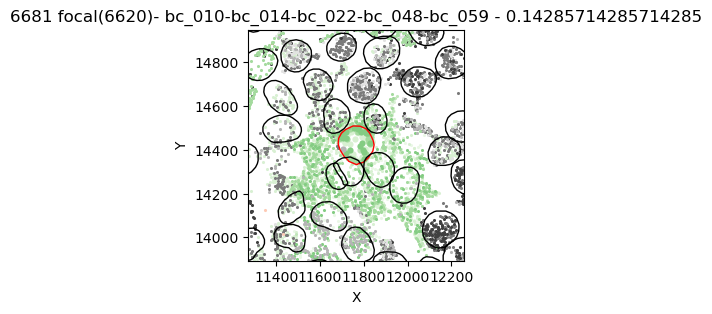

In [ ]:
for i in range(5):

    # ix = np.where((bc_square < 0.4) & (bc_square > 0.2))

    focal_index = ix_with_enough_and_bcs[i]
    focal_cell_id = random_df.iloc[focal_index]['cell_id']

    # focal_index_big = has_bcs[has_bcs['cell_id'] == focal_cell_id].index[0]

    # ix_of_interest = np.where(braycurtis_dist_square[focal_index_big,:] < 0.4)

    ix_of_interest = np.where(bc_square[focal_index,:] < 0.3)
    # ix_of_interest = np.where(bc_square[focal_index,:] < 0.2)
    # cell_ids_to_check = has_bcs.iloc[ix_of_interest[0]]['cell_id'].values
    cell_ids_to_check = random_df.iloc[ix_of_interest[0]]['cell_id'].values

    print('Focal index:',focal_index,'focal cell id:',focal_cell_id,'number of close cells:',len(ix_of_interest[0]))

    for c,cell_id in enumerate(cell_ids_to_check):

        print(cell_id,
            random_df['cell_id'].values[ix_of_interest[0][c]],
            bc_square[focal_index,ix_of_interest[0][c]])

        region = tools.get_polygons_around_polygon(sg_obj,str(cell_id),image_scale=10,id_field='cell_id')
        gene_names = tools.get_all_barcodes_in_region(df,region['object_id'].values,literal_eval_bool=True)

        # true_genes = ['bc_001','bc_029','bc_031','bc_087']
        true_genes = literal_eval(random_df[random_df['cell_id'] == focal_cell_id]['called_barcodes'].values[0])

        print('True genes:',true_genes)

        non_zero_gene_names = random_df

        print(random_df[random_df['cell_id'] == cell_id][['cell_id']+gene_names])

        c_map = {gene:sns.color_palette('Greens',10)[i] for i,gene in enumerate(true_genes)}
        
        g1 = 0
        g2 = 0
        for g,gene in enumerate(gene_names):
            if gene not in true_genes:
                if gene not in names_here[c]:
                    c_map[gene] = sns.color_palette('Greys',4)[g1%4]
                    g1 += 1
                else:
                    c_map[gene] = sns.color_palette('Reds',4)[g2%4]
                    g2 += 1

        fig = plt.figure(figsize=(3,3))
        ax = plt.gca()

        tools.plot_polygons_and_points(sg_obj,[str(cell_id)],gene_names=gene_names,annotate=False,image_scale=5,
                                    interior_marker='o',exterior_marker='.',marker_size=20,color_map=c_map,single_mode=False,id_field='cell_id',ax=ax)
        
        ax.set_title(f'{cell_id} focal({focal_cell_id})- {names_here[ix_of_interest[0][c]]} - {bc_square[focal_index,ix_of_interest[0][c]]}')

        # sg_obj_only_bcs.plot_polygon_and_points(mapping_dict[cell_id],gene_names=gene_names,annotate=False)

4942

Focal index: 4942 focal cell id: 5600 number of close cells: 5
Focal cell id 5600
Possible siters ['5549' '5600' '5648' '5656' '13929']
5549 5549 0.13821138211382109
True genes: ['bc_001', 'bc_004', 'bc_035', 'bc_041', 'bc_053', 'bc_062', 'bc_066']
     cell_id  bc_001  bc_009  bc_020  bc_001  bc_060  bc_068  bc_001  bc_009  \
5514    5549    12.0     0.0     0.0    12.0     0.0     0.0    12.0     0.0   

      bc_033  ...  bc_091  bc_014  bc_020  bc_084  bc_091  bc_005  bc_014  \
5514     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      bc_020  bc_084  bc_091  
5514     0.0     0.0     0.0  

[1 rows x 61 columns]
5600 5600 0.0
True genes: ['bc_001', 'bc_004', 'bc_035', 'bc_041', 'bc_053', 'bc_062', 'bc_066']
     cell_id  bc_009  bc_014  bc_059  bc_083  bc_090  bc_091  bc_022  bc_076  \
5609    5600     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      bc_086  ...  bc_025  bc_035  bc_039  bc_059  bc_060  bc_062  bc_085  \
5609     0.0  .

/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_83216/2466214295.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(3,3))


10970 10970 0.3513513513513513
True genes: ['bc_004', 'bc_068', 'bc_084', 'bc_091']
      cell_id  bc_011  bc_019  bc_041  bc_052  bc_009  bc_019  bc_020  bc_064  \
10969   10970     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       bc_002  ...  bc_057  bc_074  bc_003  bc_041  bc_003  bc_028  bc_041  \
10969     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       bc_043  bc_052  bc_057  
10969     0.0     0.0     0.0  

[1 rows x 192 columns]
10957 10957 0.35532994923857875
True genes: ['bc_004', 'bc_068', 'bc_084', 'bc_091']
      cell_id  bc_059  bc_064  bc_070  bc_064  bc_070  bc_019  bc_020  bc_064  \
10982   10957     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       bc_019  ...  bc_041  bc_059  bc_033  bc_076  bc_002  bc_003  bc_033  \
10982     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       bc_041  bc_074  bc_091  
10982     0.0     0.0    71.0  

[1 rows x 161 columns]
11023 11023 0.3

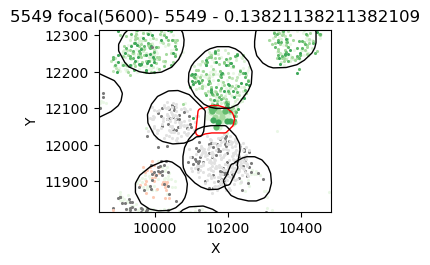

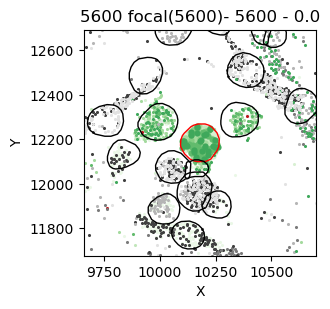

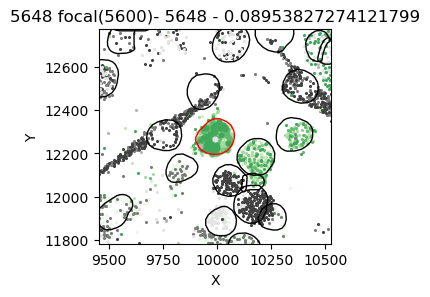

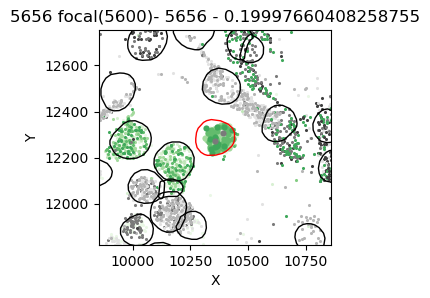

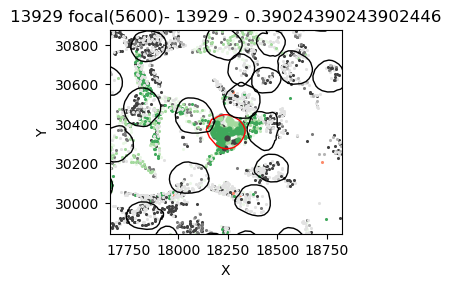

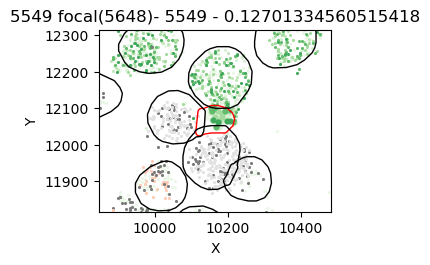

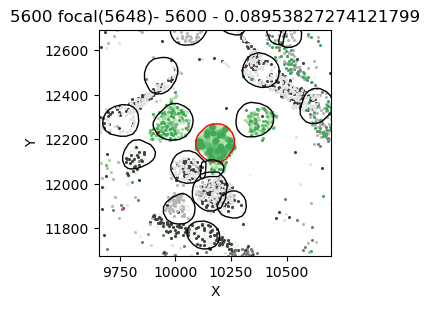

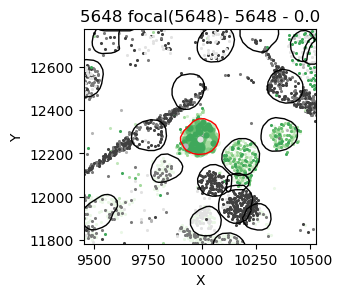

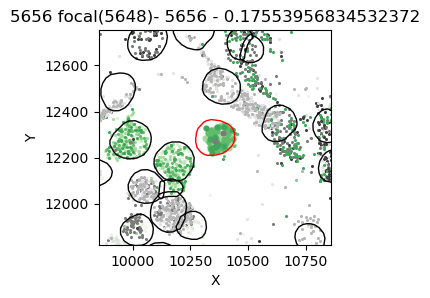

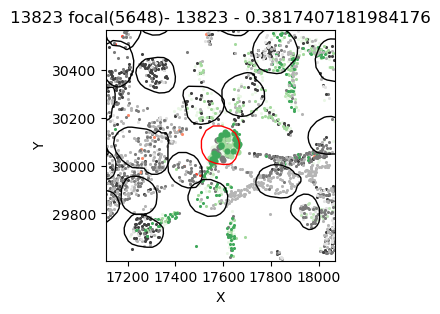

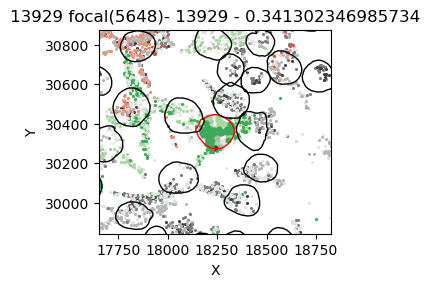

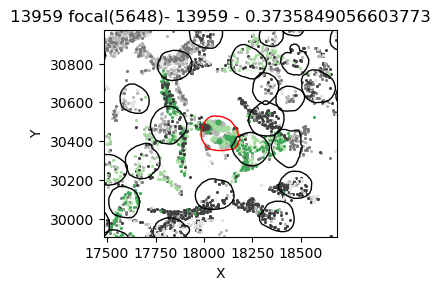

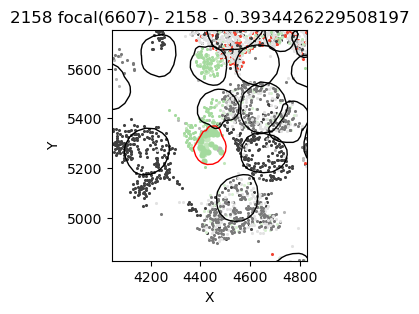

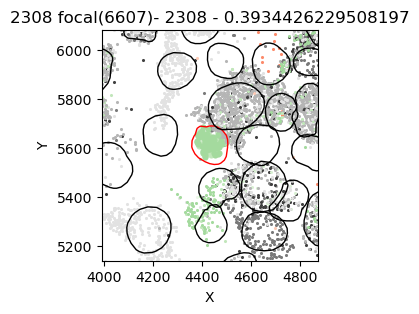

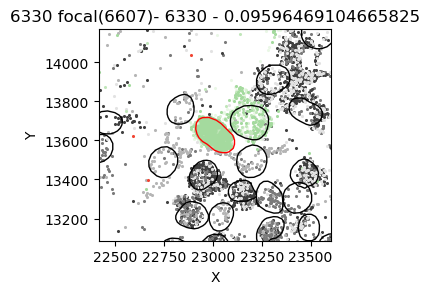

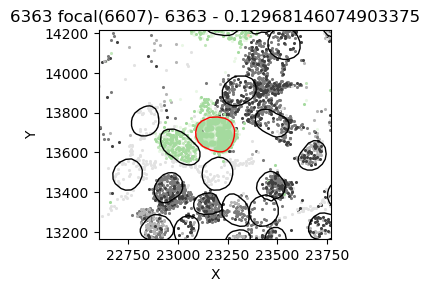

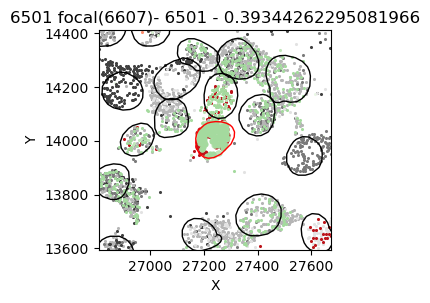

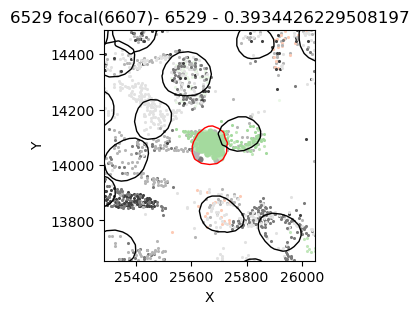

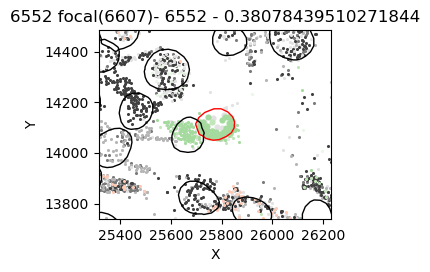

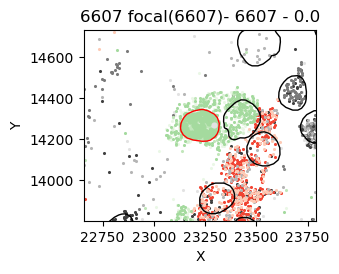

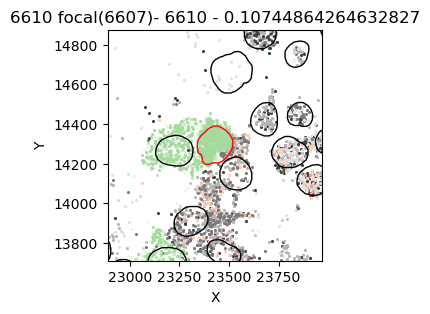

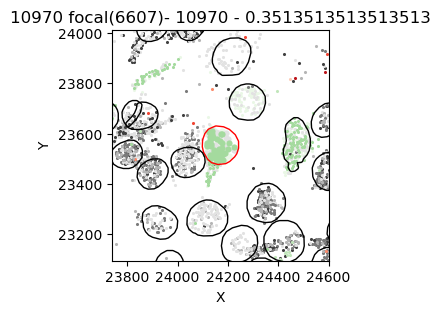

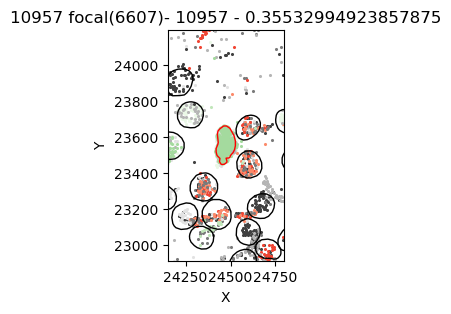

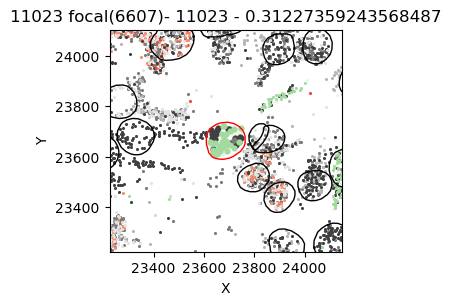

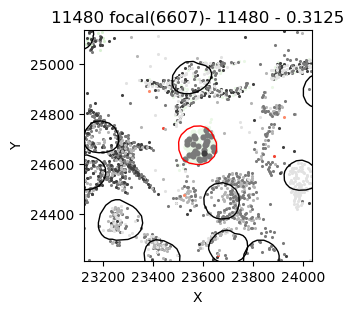

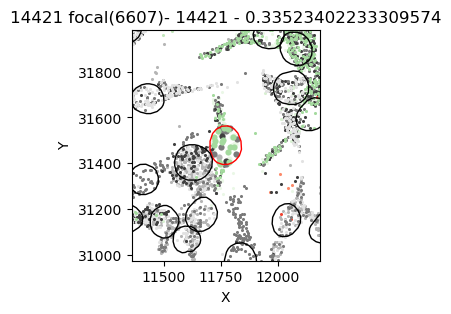

In [124]:
for i in range(3):

    # ix = np.where((bc_square < 0.4) & (bc_square > 0.2))

    focal_index = ix_with_enough_and_bcs[i]
    focal_cell_id = random_df.iloc[focal_index]['cell_id']

    # focal_index_big = has_bcs[has_bcs['cell_id'] == focal_cell_id].index[0]
    focal_index_big =  np.where(has_bcs['cell_id'] == focal_cell_id)[0][0]

    ix_of_interest = np.where(braycurtis_dist_square[focal_index_big,:] < 0.4)

    # ix_of_interest = np.where(bc_square[focal_index,:] < 0.4)
    # ix_of_interest = np.where(bc_square[focal_index,:] < 0.2)
    cell_ids_to_check = has_bcs.iloc[ix_of_interest[0]]['cell_id'].values

    print('Focal index:',focal_index_big,'focal cell id:',focal_cell_id,'number of close cells:',len(ix_of_interest[0]))

    print('Focal cell id',focal_cell_id)
    print('Possible siters',cell_ids_to_check)

    for c,cell_id in enumerate(cell_ids_to_check):

        print(cell_id,
            has_bcs['cell_id'].values[ix_of_interest[0][c]],
            braycurtis_dist_square[focal_index_big,ix_of_interest[0][c]])

        region = tools.get_polygons_around_polygon(sg_obj,str(cell_id),image_scale=10,id_field='cell_id')
        gene_names = tools.get_all_barcodes_in_region(df,region['object_id'].values,literal_eval_bool=True)

        # true_genes = ['bc_001','bc_029','bc_031','bc_087']
        true_genes = literal_eval(has_bcs[has_bcs['cell_id'] == focal_cell_id]['called_barcodes'].values[0])

        print('True genes:',true_genes)

        # non_zero_gene_names = has_bcs

        print(has_bcs[has_bcs['cell_id'] == cell_id][['cell_id']+gene_names])

        c_map = {gene:sns.color_palette('Greens',10)[i] for i,gene in enumerate(true_genes)}
        
        g1 = 0
        g2 = 0
        for g,gene in enumerate(gene_names):
            if gene not in true_genes:
                if gene not in names_here[c]:
                    c_map[gene] = sns.color_palette('Greys',4)[g1%4]
                    g1 += 1
                else:
                    c_map[gene] = sns.color_palette('Reds',4)[g2%4]
                    g2 += 1

        fig = plt.figure(figsize=(3,3))
        ax = plt.gca()

        tools.plot_polygons_and_points(sg_obj,[str(cell_id)],gene_names=gene_names,annotate=False,image_scale=5,
                                    interior_marker='o',exterior_marker='.',marker_size=20,color_map=c_map,single_mode=False,id_field='cell_id',ax=ax)
        
        ax.set_title(f'{cell_id} focal({focal_cell_id})- {has_bcs["cell_id"].values[ix_of_interest[0][c]]} - {braycurtis_dist_square[focal_index_big,ix_of_interest[0][c]]}')

        # sg_obj_only_bcs.plot_polygon_and_points(mapping_dict[cell_id],gene_names=gene_names,annotate=False)

In [102]:
literal_eval(has_bcs[has_bcs['cell_id'] == focal_cell_id]['called_barcodes'].values[0])

['bc_001', 'bc_004', 'bc_035', 'bc_041', 'bc_053', 'bc_062', 'bc_066']

In [ ]:
# get columns for the df where the sum of the columns is greater than 0
# get the sum of the columns


array(['bc_001', 'bc_004', 'bc_007', 'bc_011', 'bc_012', 'bc_017',
       'bc_025', 'bc_027', 'bc_030', 'bc_031', 'bc_035', 'bc_039',
       'bc_041', 'bc_048', 'bc_049', 'bc_050', 'bc_053', 'bc_059',
       'bc_062', 'bc_066', 'bc_068', 'bc_069', 'bc_076', 'bc_079',
       'bc_088', 'bc_095'], dtype='<U6')

In [117]:
barcode_cols

['bc_001',
 'bc_002',
 'bc_003',
 'bc_004',
 'bc_005',
 'bc_006',
 'bc_007',
 'bc_008',
 'bc_009',
 'bc_010',
 'bc_011',
 'bc_012',
 'bc_013',
 'bc_014',
 'bc_015',
 'bc_016',
 'bc_017',
 'bc_018',
 'bc_019',
 'bc_020',
 'bc_021',
 'bc_022',
 'bc_023',
 'bc_024',
 'bc_025',
 'bc_026',
 'bc_027',
 'bc_028',
 'bc_029',
 'bc_030',
 'bc_031',
 'bc_032',
 'bc_033',
 'bc_034',
 'bc_035',
 'bc_036',
 'bc_037',
 'bc_038',
 'bc_039',
 'bc_040',
 'bc_041',
 'bc_042',
 'bc_043',
 'bc_044',
 'bc_045',
 'bc_046',
 'bc_047',
 'bc_048',
 'bc_049',
 'bc_050',
 'bc_051',
 'bc_052',
 'bc_053',
 'bc_054',
 'bc_055',
 'bc_056',
 'bc_057',
 'bc_058',
 'bc_059',
 'bc_060',
 'bc_061',
 'bc_062',
 'bc_063',
 'bc_064',
 'bc_065',
 'bc_066',
 'bc_067',
 'bc_068',
 'bc_069',
 'bc_070',
 'bc_071',
 'bc_072',
 'bc_073',
 'bc_074',
 'bc_075',
 'bc_076',
 'bc_077',
 'bc_078',
 'bc_079',
 'bc_080',
 'bc_081',
 'bc_082',
 'bc_083',
 'bc_084',
 'bc_085',
 'bc_086',
 'bc_087',
 'bc_088',
 'bc_089',
 'bc_090',
 'bc_091',

In [ ]:
any_nonzeros = np.asarray(barcode_cols)[np.where((has_bcs[has_bcs['cell_id'].isin(cell_ids_to_check)][barcode_cols].sum(axis=0) > 2))[0]]
has_bcs[has_bcs['cell_id'].isin(cell_ids_to_check)][['cell_id']+true_genes+[gene for gene in any_nonzeros if gene not in true_genes]]

,cell_id,bc_004,bc_068,bc_084,bc_091,bc_003,bc_010,bc_013,bc_016,bc_024,...,bc_031,bc_034,bc_039,bc_041,bc_056,bc_060,bc_067,bc_074,bc_076,bc_085
2159,2158,0.0,0.0,9.0,20.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2307,2308,0.0,0.0,41.0,53.0,3.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,5.0,5.0,1.0,0.0,0.0,8.0
6347,6330,63.0,19.0,49.0,106.0,0.0,0.0,1.0,0.0,0.0,...,0.0,17.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6372,6363,69.0,20.0,34.0,66.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
6498,6501,0.0,0.0,38.0,72.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0
6522,6529,0.0,0.0,30.0,67.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,26.0,0.0
6541,6552,1.0,0.0,19.0,42.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0
6608,6607,58.0,12.0,36.0,75.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6626,6610,60.0,8.0,23.0,81.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0
10969,10970,33.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,...,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
example_sets = {}
example_sets_bc_diss = {}

seen_already = []

for i in range(5):

    # ix = np.where((bc_square < 0.4) & (bc_square > 0.2))

    focal_index = ix_with_enough_and_bcs[i]
    focal_cell_id = random_df.iloc[focal_index]['cell_id']

    # focal_index_big = has_bcs[has_bcs['cell_id'] == focal_cell_id].index[0]
    focal_index_big =  np.where(has_bcs['cell_id'] == focal_cell_id)[0][0]

    ix_of_interest = np.where(braycurtis_dist_square[focal_index_big,:] < 0.3)

    # ix_of_interest = np.where(bc_square[focal_index,:] < 0.4)
    # ix_of_interest = np.where(bc_square[focal_index,:] < 0.2)
    cell_ids_to_check = has_bcs.iloc[ix_of_interest[0]]['cell_id'].values

    if focal_cell_id not in seen_already:
        seen_already += list(cell_ids_to_check)
        example_sets[focal_cell_id] = cell_ids_to_check
        example_sets_bc_diss[focal_cell_id] = braycurtis_dist_square[focal_index_big,ix_of_interest[0]]

    # example_sets[focal_cell_id] = cell_ids_to_check

In [169]:
for focal_cell_id,cell_ids_to_check in example_sets.items():
    print('Focal cell id:',focal_cell_id)
    print('Possible sisters',cell_ids_to_check)
    print('True genes:',literal_eval(has_bcs[has_bcs['cell_id'] == focal_cell_id]['called_barcodes'].values[0]))
    print('Bray-curtis_dissimilarities',example_sets_bc_diss[focal_cell_id])
    true_genes = literal_eval(has_bcs[has_bcs['cell_id'] == focal_cell_id]['called_barcodes'].values[0])
    any_nonzeros = np.asarray(barcode_cols)[np.where((has_bcs[has_bcs['cell_id'].isin(cell_ids_to_check)][barcode_cols].sum(axis=0) > 2))[0]]
    print(has_bcs[has_bcs['cell_id'].isin(cell_ids_to_check)][['cell_id']+true_genes+[gene for gene in any_nonzeros if gene not in true_genes]].to_string(index=False))

Focal cell id: 5600
Possible sisters ['5549' '5600' '5648' '5656']
True genes: ['bc_001', 'bc_004', 'bc_035', 'bc_041', 'bc_053', 'bc_062', 'bc_066']
Bray-curtis_dissimilarities [0.13821138 0.         0.08953827 0.1999766 ]
cell_id  bc_001  bc_004  bc_035  bc_041  bc_053  bc_062  bc_066
   5549    12.0     9.0     1.0     8.0     0.0     5.0     4.0
   5600    61.0    49.0    15.0    42.0     7.0    38.0    30.0
   5648    69.0    46.0    13.0    57.0     4.0    35.0    35.0
   5656    32.0    15.0     7.0    41.0     0.0    29.0    12.0
Focal cell id: 6607
Possible sisters ['6330' '6363' '6607' '6610']
True genes: ['bc_004', 'bc_068', 'bc_084', 'bc_091']
Bray-curtis_dissimilarities [0.09596469 0.12968146 0.         0.10744864]
cell_id  bc_004  bc_068  bc_084  bc_091  bc_034  bc_041
   6330    63.0    19.0    49.0   106.0    17.0     0.0
   6363    69.0    20.0    34.0    66.0     9.0     1.0
   6607    58.0    12.0    36.0    75.0     0.0     0.0
   6610    60.0     8.0    23.0    81.

True genes: ['bc_001', 'bc_004', 'bc_035', 'bc_041', 'bc_053', 'bc_062', 'bc_066']
      cell_id  bc_047  bc_053  bc_056  bc_073  bc_031  bc_047  bc_060  bc_063  \
14424   14421     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       bc_073  ...  bc_083  bc_086  bc_088  bc_014  bc_084  bc_047  bc_053  \
14424     0.0  ...     0.0     0.0     0.0     1.0     0.0     0.0     0.0   

       bc_057  bc_076  bc_077  
14424     0.0     0.0     0.0  

[1 rows x 208 columns]


FileNotFoundError: [Errno 2] No such file or directory: 'plots/figures/clustering_examples/14421.pdf'

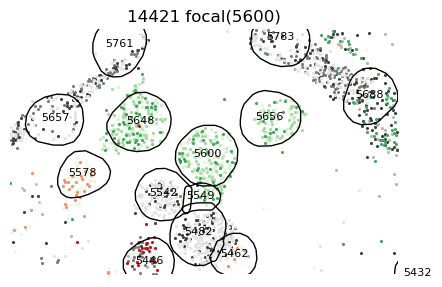

In [170]:
# example_sets = {'5600':['5549','5600','5648','5656','13929']}

scale = 2

# dictionary of marker sizes based on the scale
# marker_sizes = {2:5,10:1}

# for scale in [2,10]:

for focal_cell_id,cell_ids_to_check in example_sets.items():

    #   region = tools.get_polygons_around_polygon(sg_obj,object_id,image_scale=5*scale,id_field='object_id')

    region = tools.get_polygons_around_polygon(sg_obj,str(cell_id),image_scale=10,id_field='cell_id')
    gene_names = tools.get_all_barcodes_in_region(df,region['object_id'].values,literal_eval_bool=True)

    true_genes = literal_eval(has_bcs[has_bcs['cell_id'] == focal_cell_id]['called_barcodes'].values[0])

    print('True genes:',true_genes)

    # non_zero_gene_names = has_bcs

    print(has_bcs[has_bcs['cell_id'] == cell_id][['cell_id']+gene_names])

    c_map = {gene:sns.color_palette('Greens',10)[i] for i,gene in enumerate(true_genes)}
    
    g1 = 0
    g2 = 0
    for g,gene in enumerate(gene_names):
        if gene not in true_genes:
            if gene not in names_here[c]:
                c_map[gene] = sns.color_palette('Greys',4)[g1%4]
                g1 += 1
            else:
                c_map[gene] = sns.color_palette('Reds',4)[g2%4]
                g2 += 1

    fig = plt.figure(figsize=(5,5))
    ax = plt.gca()

    tools.plot_polygons_and_points(sg_obj,
                                #    [str(focal_cell_id)],
                                [str(x) for x in cell_ids_to_check],
                                   gene_names=gene_names,
                                   annotate=False,image_scale=1,
                                   annotate_cells=True,annotation_color='k',

                                #    focal_outline_color='w',other_outline_color='w',
                                   focal_outline_color='k',other_outline_color='k',
                                #    show_image=True,image_path=image_path,
                                interior_marker='.',exterior_marker='.',
                                marker_size=20,color_map=c_map,
                                single_mode=False,id_field='cell_id',ax=ax)
    
    ax.set_title(f'{cell_id} focal({focal_cell_id})')

    #   counter = 0
    #   for gene in barcode_names:
    #       if gene not in color_map.keys():
    #           color_map[gene] = sns.color_palette('Greys',10)[counter%10]
    #           counter+=1


    #   print([(g,matplotlib.colors.to_hex(c)) for (g,c) in color_map.items()])

    #   plt.figure(figsize=(10,10))

    #   ax = plt.subplot(1,2,1)

    #   region = tools.get_polygons_around_polygon(sg_obj,object_id,image_scale=scale,id_field='object_id')

    #   sisters = ['4957','4946','4900','4961']

    #   tools.plot_polygons_and_points(sg_obj,
    #                                 sisters,
    #                                 #  region['object_id'].values,
    #                                 id_field='object_id',
    #                                 gene_names=barcode_names,
    #                                 annotate=False,image_scale=scale,single_mode=False,
    #                                 focal_outline_color='#fb6a4a',other_outline_color='gray',
    #                                 interior_marker='.',color_map=color_map,
    #                                 exterior_marker='.',marker_size=5,ax=ax,
    #                                 show_image=True,image_path=image_path,
    #                                 annotate_cells=True
    #                                 )

    #   plt.title('Barcode Spots')
      
    plt.axis('off')
      
    #   plt.axis('off')

    plt.savefig(f'plots/figures/clustering_examples/{cell_id}.pdf',bbox_inches='tight')
      # sg_obj_only_bcs.plot_polygon_and_points(mapping_dict[cell_id],gene_names=gene_names,annotate=False)

In [140]:
any_nonzeros = np.asarray(barcode_cols)[np.where((has_bcs[has_bcs['cell_id'].isin(cell_ids_to_check)][barcode_cols].sum(axis=0) > 2))[0]]
has_bcs[has_bcs['cell_id'].isin(cell_ids_to_check)][['cell_id']+true_genes+[gene for gene in any_nonzeros if gene not in true_genes]]

,cell_id,bc_001,bc_004,bc_035,bc_041,bc_053,bc_062,bc_066,bc_012,bc_039
5514,5549,12.0,9.0,1.0,8.0,0.0,5.0,4.0,0.0,0.0
5609,5600,61.0,49.0,15.0,42.0,7.0,38.0,30.0,2.0,0.0
5659,5648,69.0,46.0,13.0,57.0,4.0,35.0,35.0,0.0,0.0
5660,5656,32.0,15.0,7.0,41.0,0.0,29.0,12.0,0.0,0.0
13934,13929,53.0,0.0,13.0,35.0,0.0,0.0,35.0,2.0,18.0


,cell_id,cluster
6603,6600,5
6609,6615,5
6618,6625,5
6631,6620,5
6691,6681,5


     cell_id  cluster
5514    5549       28
5609    5600       28
5659    5648       28
5660    5656       28
[[0.         0.13821138 0.12701335 0.23407615]
 [0.13821138 0.         0.08953827 0.1999766 ]
 [0.12701335 0.08953827 0.         0.17553957]
 [0.23407615 0.1999766  0.17553957 0.        ]]
     cell_id  cluster
6347    6330       22
6372    6363       22
6608    6607       22
6626    6610       22
[[0.         0.14521576 0.09596469 0.1842246 ]
 [0.14521576 0.         0.12968146 0.18166167]
 [0.09596469 0.12968146 0.         0.10744864]
 [0.1842246  0.18166167 0.10744864 0.        ]]
     cell_id  cluster
6603    6600        5
6609    6615        5
6618    6625        5
6631    6620        5
6691    6681        5
[[0.         0.21904762 0.11741742 0.12037037 0.14502924]
 [0.21904762 0.         0.22265122 0.24867725 0.21854637]
 [0.11741742 0.22265122 0.         0.1986987  0.23812233]
 [0.12037037 0.24867725 0.1986987  0.         0.15019493]
 [0.14502924 0.21854637 0.23812233 0.1

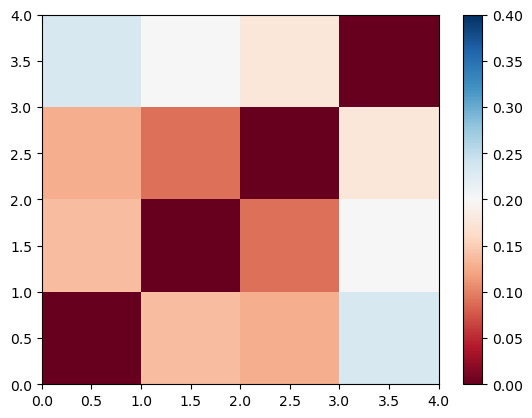

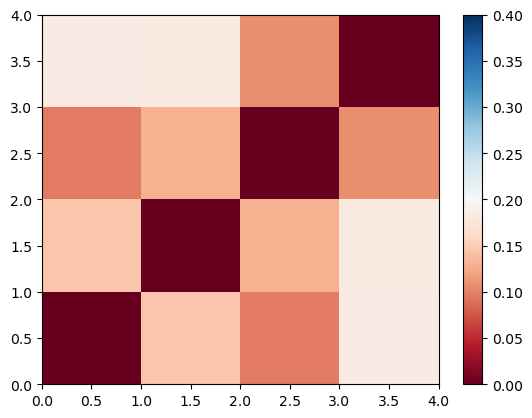

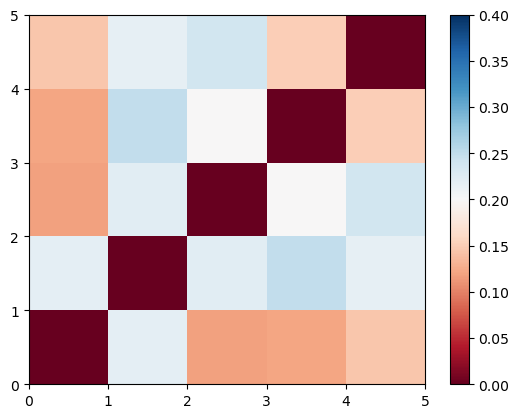

In [189]:
for focal_cell_id,cell_ids_to_check in example_sets.items():
    indices = np.where(has_bcs['cell_id'].isin(cell_ids_to_check))[0]

    submatrix = braycurtis_dist_square[indices,:][:,indices]

    print(cluster_df[cluster_df['cell_id'].isin(cell_ids_to_check)][['cell_id','cluster']])

    print(submatrix )
    plt.figure()
    plt.pcolormesh(submatrix,cmap='RdBu',vmin=0,vmax=0.4)
    plt.colorbar()

In [175]:
braycurtis_dist_square[indices,indices]

array([0., 0., 0., 0.])

In [173]:
np.where(has_bcs['cell_id'].isin(cell_ids_to_check))

(array([4856, 4942, 4984, 4985]),)

In [194]:
cluster_df[cluster_df['cell_id'].isin(['4957','4946','4900','4961'])]

,object_id,AKT1,AXL,BGN,BIRC3,BIRC5,BMP2,BMP4,CALD1,CAPG,...,called_barcodes,n_called_barcodes,barcode_names,nucleus,nucleus_dilated,nucleus_centroid,center_x,center_y,area,cluster
4893,4900,4.0,1.0,0.0,0.0,5.0,0.0,0.0,7.0,30.0,...,"['bc_013', 'bc_023', 'bc_035']",3,bc_013-bc_023-bc_035,"POLYGON ((18639 10740, 18656 10742, 18670 1075...",POLYGON ((18635.83772233983 10730.513167019495...,POINT (18641.84110712455 10800.657901930634),18641.841107,10800.657902,13662.532245,94
4932,4946,8.0,0.0,0.0,0.0,10.0,0.0,0.0,23.0,60.0,...,"['bc_013', 'bc_023', 'bc_035', 'bc_061', 'bc_0...",6,bc_013-bc_023-bc_035-bc_061-bc_073-bc_088,"POLYGON ((18528 10828, 18543 10828, 18556 1083...",POLYGON ((18526.534513389106 10818.10796537646...,POINT (18520.856452361517 10880.912901522062),18520.856452,10880.912902,14401.690589,94
4954,4957,5.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,29.0,...,"['bc_013', 'bc_023', 'bc_035']",3,bc_013-bc_023-bc_035,"POLYGON ((18705 10852, 18721 10854, 18739 1086...",POLYGON ((18654.024298182103 10911.50539914087...,POINT (18712.61474729274 10910.459324818485),18712.614747,10910.459325,13246.863297,94
4962,4961,8.0,0.0,0.0,0.0,7.0,0.0,0.0,17.0,76.0,...,"['bc_013', 'bc_023', 'bc_035']",3,bc_013-bc_023-bc_035,"POLYGON ((18860 10861, 18889 10863, 18906 1087...",POLYGON ((18857.830695421813 10851.23812939816...,POINT (18866.73339051159 10917.40631502041),18866.733391,10917.406315,14554.946746,94
